IA PAU DATA CHALLENGE

04/12/2022  

# I.	RÉSUMÉ
## 1.	Contexte et description du projet

Le data challenge a débuté le vendredi 2 décembre 2022, à 18h00 : les entreprises ont tout d’abord présenté en distanciel le problème à résoudre, puis les étudiants ont constitué des équipes et choisi l’un des sujets. Chacun de ces sujets nécessitait la mise en œuvre de technologies dites d’intelligence artificielle.
Jusqu’au dimanche 4 décembre 14h00, chaque équipe a recherché une solution pour son projet et préparé un rendu sous forme de maquette et diapositives de présentation. Durant cette période, des points réguliers ont été effectués avec un mentor technique de chaque projet. 

## 2.	Projet Boavizta
Au sein de l'équipe, nous avons décidé de choisir le projet Boavizta qui avais comme but identifier un modèle NLP présentant le moins d’impact environnemental. L’objectif était de construire un modèle de NLP avec le coût environnemental le plus bas possible. Le projet concerne la tâche de classification de sentiment, c’est à dire de classer des phrases selon que les sentiments décrits sont positifs ou négatifs. Il était demandé d’explorer l’état de l’art et trouver des modèles qui offrent des compromis précision/impact plus intéressants que les modèles classiquement utilisés.

Descriptif du jeu de données fourni : Les données étaient constituées d’un sous-ensemble de 30000 critiques de films extraites du site IMDb. Un second corpus wikitext était fourni pour apprendre son propre modèle de langage ou plongement lexical. L’usage de ce second corpus était optionnel.


## 3.	Présentation du groupe
 	

| Prénom | Nom | Profil | École | 
| ---------- | --------- | ------------------------- | ------ 
| Noellie    | AKA  |M2 MSID  | UPPA | 
| David    | DE CARVALHO  |M2 MSID  | UPPA |
| Marisol  | JIMENEZ  |M2 MSID  | UPPA |
| Léa    | LIGNIER  |M2 MSID  | UPPA |



# II.	GESTION DE PROJET
## 1.	Comprendre les données
 
Nous avons commencé par l'analyse exploratoire des données et le nettoyage des données, nous n'avons pas trouvé de valeurs manquantes et nous avons donc pu commencer immédiatement l'analyse descriptive. Nous avons trouvé deux points importants à noter : en général, nous avons vu que nous avions une plus grande proportion d'opinions négatives, et le deuxième contre-intuitivement les mots les plus fréquents pour chaque catégorie étaient les mêmes, cependant ils étaient clairement constitués de mots qui étaient en fait des connecteurs, c'est là que le nettoyage des données interviendrait.

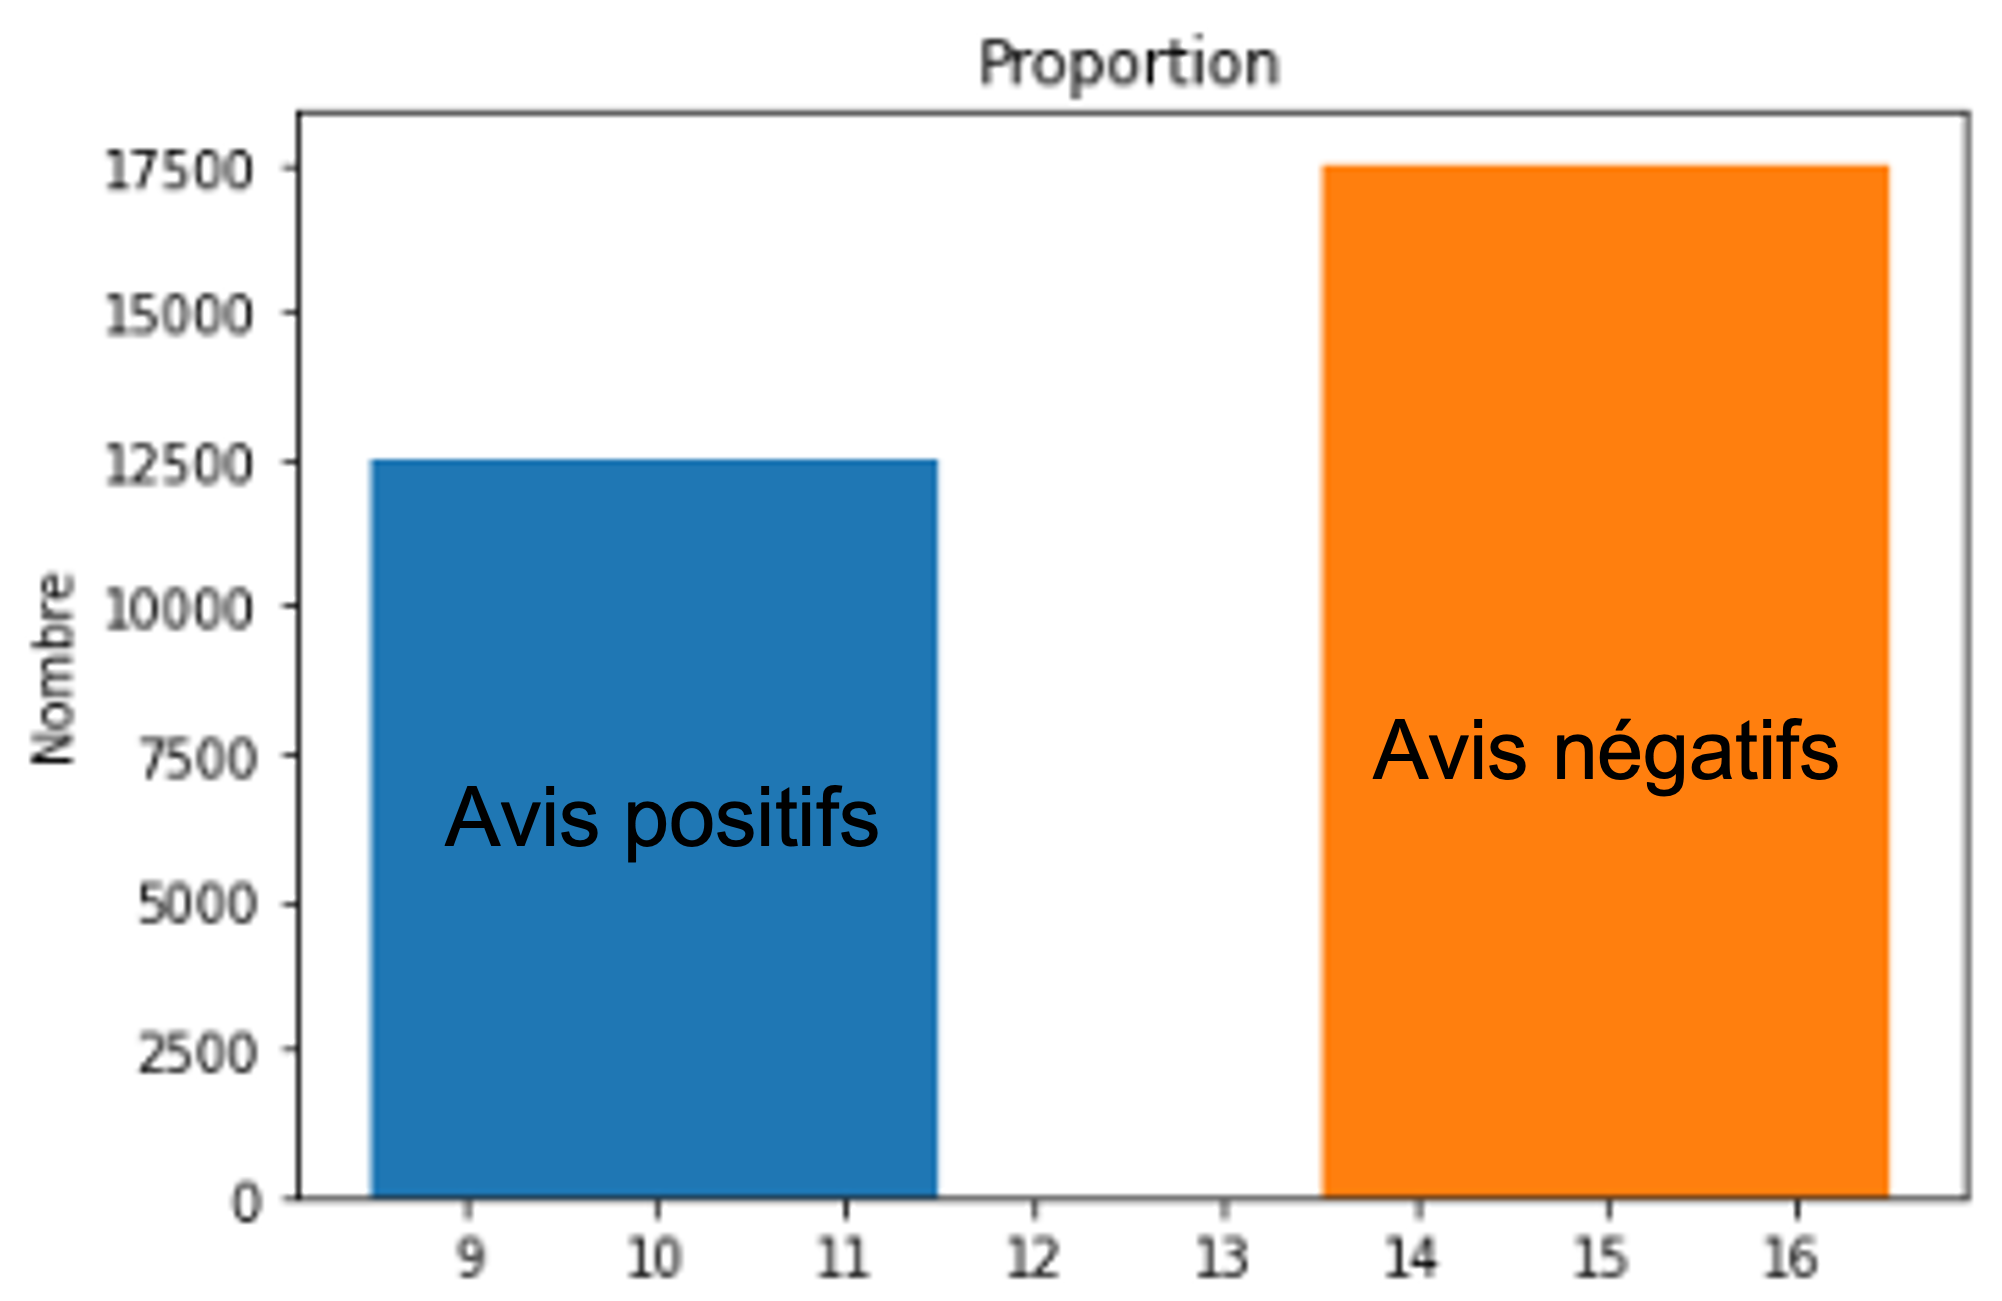

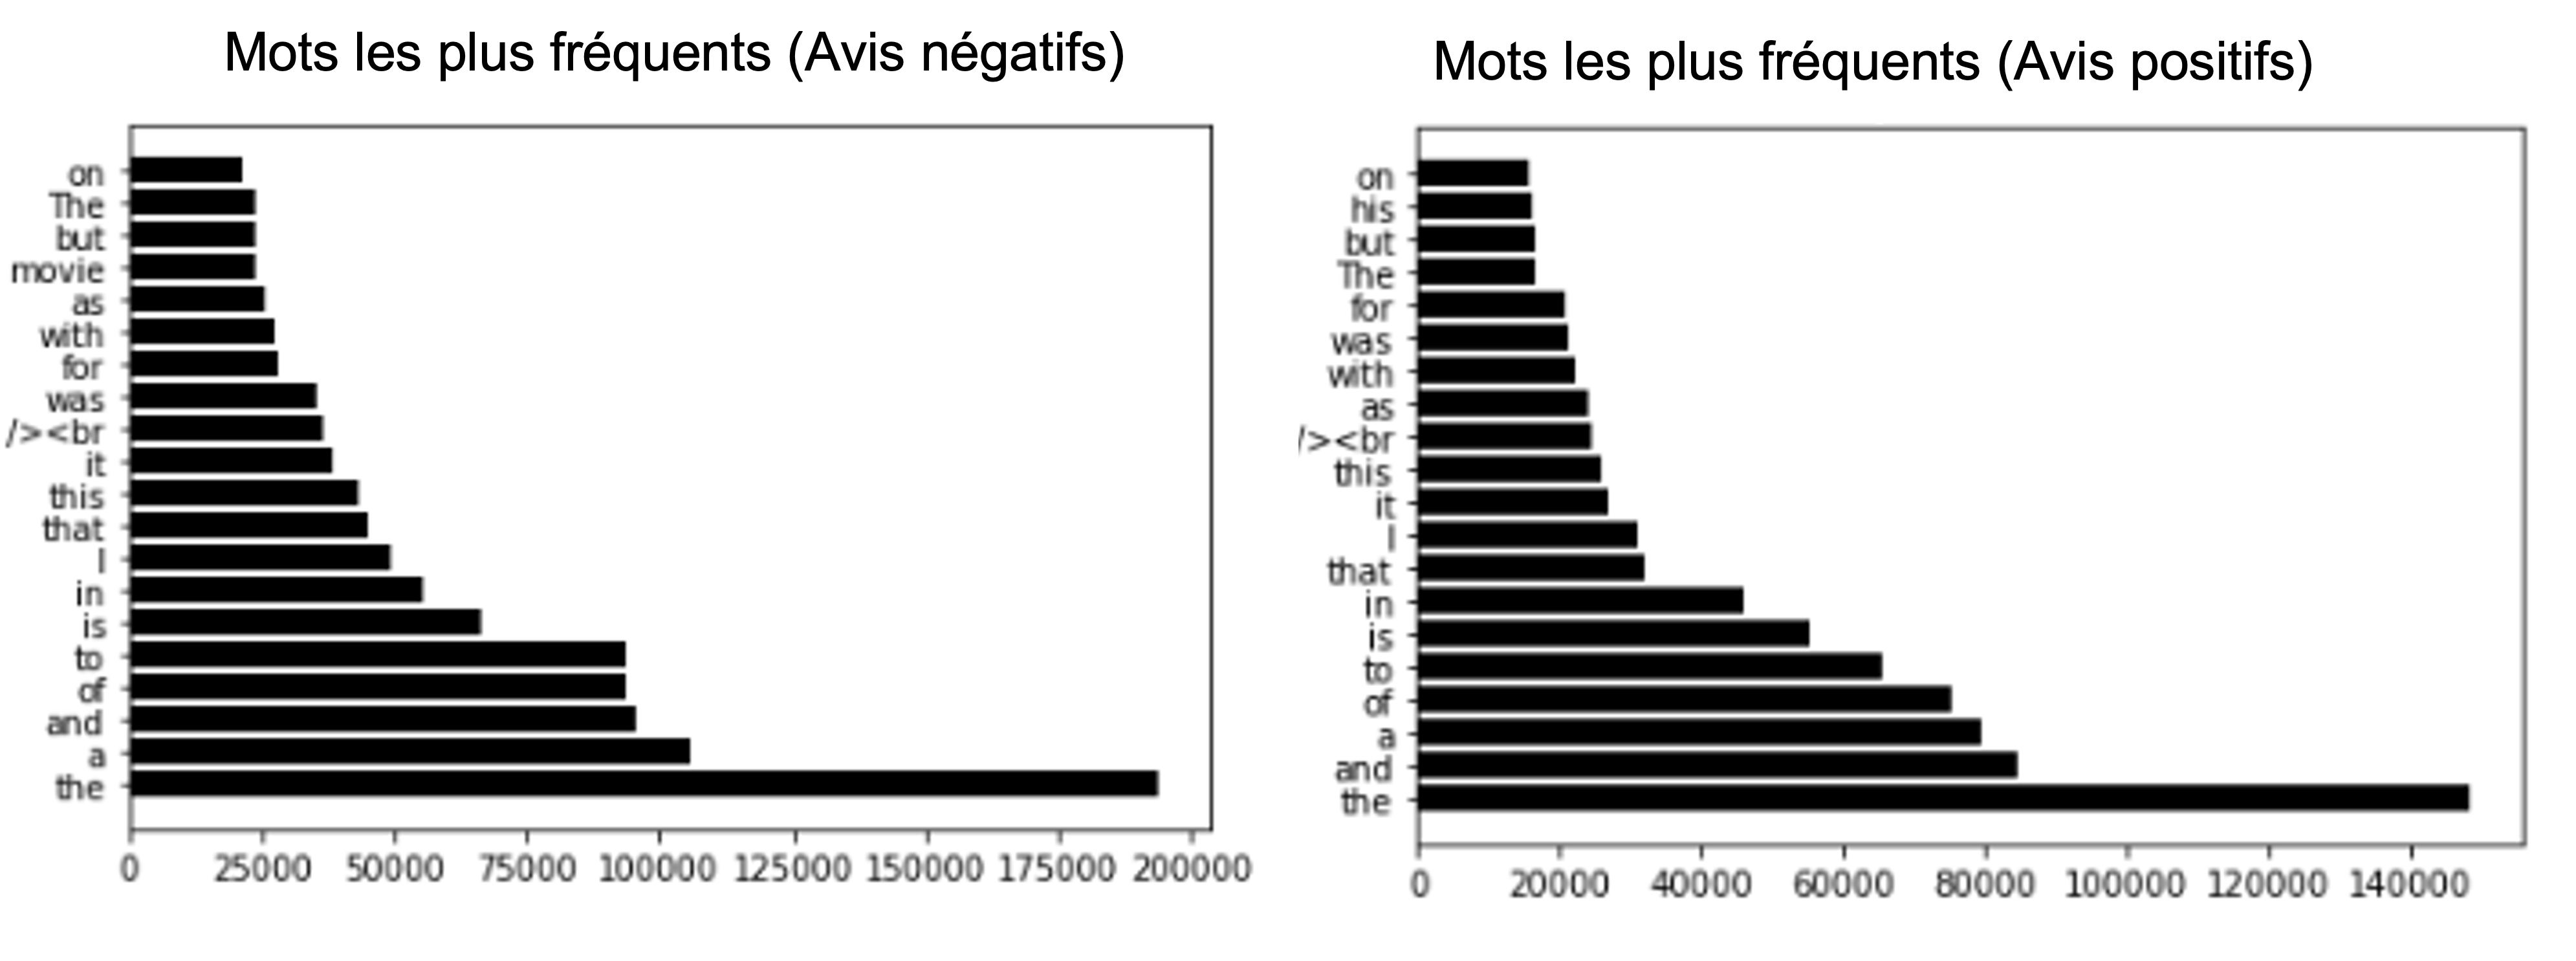

## 2.	Data Pre-processing

Pour l'étape de nettoyage, nous avons constaté qu'il existe différentes formes pour les sujet NLP, comme la lemmatisation, stimming, stopwrods, l'élimination de la ponctuation et la tokenisation. Celles-ci visent à transformer des mots tels que des adverbes, des adjectifs ou des verbes conjugués dans leur forme la plus pure, ainsi qu'à supprimer les articles et les prépositions. Pour réaliser toutes ces tâches, nous avons utilisé la bibliothèque nltk.

## 3.	Modeling Development

Une fois que nos données ont été préparées, nous avons exploré les différents modèles que nous pouvions adapter, nos options étaient SVM, Gradient Boosting, Bayesian et Régression logistique, pour décider quel serait le modèle final étant donné les avantages et les inconvénients intrinsèques de chacun, nous avons exécuté un modèle pour chaque méthode et évalué trois aspects : temps d'exécution, erreur d'apprentissage et précision. Dans le cas du SVM, le modèle a pris tellement de temps que nous avons obtenu un chiffre négatif comme référence, contrairement la régression logistique nous a donné un temps d'exécution assez bas sans perdre un grand pourcentage de précision. Finalement étant donné qu'un élément principal à valoriser était la diminution de l'empreinte de CO2 et qu'un temps d'exécution plus long apportait en conséquence une empreinte plus grande, il était indiscutable que la meilleure méthode était celle de Bayes.

# IV.	CONCLUSION

Le modèle final a été soumis à un classement effectué par les organisateurs où l'impression carbone et la précision du code ont été pondérées. Cette position ainsi qu'une présentation finale de notre procédure aux organisateurs ont servi de base à la décision finale du jury. Finalement, nous n'avons pas été choisis pour la phase finale, mais c'était une grande expérience en tant que défi de données où nous nous sommes concentrés complètement sur le projet.

In [2]:
import os
import sys
import warnings
import sklearn
import plotly
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from datetime import timedelta

df = pd.read_csv('train.csv')

In [3]:
df.head()

id                                               text  label
0   0  I am at a distinct disadvantage here. I have n...      0
1   1  Micro-phonies is a classic Stooge short. The g...      1
2   2  The story has been told before. A deadly disea...      1
3   3  As I post this comment, IMDb currently rates A...      0
4   4  This film was reeeeeeallyyyy bad! Was it meant...      0

In [14]:
negative = df[(df['label'] == 0)]
positive= df[(df['label'] == 1)]
negative.shape

(17500, 3)

In [54]:
from collections import Counter
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mmjj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mmjj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
#delete puntuaction and token
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
#add for all rows
df[comment=tokenizer.tokenize(df.iloc[1,1])
comment

['Micro',
 'phonies',
 'is',
 'a',
 'classic',
 'Stooge',
 'short',
 'The',
 'guys',
 'are',
 'inept',
 'repairmen',
 'working',
 'at',
 'a',
 'radio',
 'station',
 'and',
 'during',
 'some',
 'horsing',
 'around',
 'in',
 'a',
 'broadcast',
 'booth',
 'Curly',
 's',
 'perfect',
 'mimic',
 'of',
 'a',
 'recording',
 'of',
 'Voices',
 'of',
 'Spring',
 'is',
 'mistaken',
 'for',
 'the',
 'real',
 'thing',
 'leading',
 'to',
 'a',
 'radio',
 'contract',
 'and',
 'a',
 'zany',
 'musical',
 'party',
 'The',
 'trio',
 's',
 'mock',
 'rendition',
 'of',
 'the',
 'quintet',
 'from',
 'Lucia',
 'de',
 'L',
 'Amamore',
 'is',
 'especially',
 'entertaining',
 'No',
 'doubt',
 'this',
 'is',
 'essential',
 'viewing',
 'for',
 'Stooge',
 'fans',
 'br',
 'br',
 'Although',
 'the',
 'evidence',
 'of',
 'Curly',
 's',
 'failing',
 'health',
 'is',
 'visible',
 'in',
 'his',
 'face',
 'and',
 'voice',
 'his',
 'performance',
 'is',
 'amazing',
 'and',
 'it',
 'is',
 'probably',
 'the',
 'last',
 'glim

In [72]:
#trouve les plus common
counter = Counter(comment)  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = counter.most_common(30)
most_occur

[('is', 8),
 ('the', 7),
 ('a', 6),
 ('of', 6),
 ('and', 5),
 ('Curly', 4),
 ('in', 3),
 ('s', 3),
 ('his', 3),
 ('Stooge', 2),
 ('short', 2),
 ('The', 2),
 ('are', 2),
 ('radio', 2),
 ('for', 2),
 ('to', 2),
 ('fans', 2),
 ('br', 2),
 ('voice', 2),
 ('last', 2),
 ('Micro', 1),
 ('phonies', 1),
 ('classic', 1),
 ('guys', 1),
 ('inept', 1),
 ('repairmen', 1),
 ('working', 1),
 ('at', 1),
 ('station', 1),
 ('during', 1)]

In [32]:
#seulement separation des mots 
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = tokenizer.tokenize(df.iloc[1,1])
sentences

['Micro-phonies is a classic Stooge short.',
 'The guys are inept repairmen working at a radio station, and during some horsing around in a broadcast booth, Curly\'s perfect mimic of a recording of "Voices of Spring" is mistaken for the real thing, leading to a radio contract and a zany musical party.',
 'The trio\'s mock rendition of the quintet from "Lucia de L\'Amamore" is especially entertaining.',
 "No doubt this is essential viewing for Stooge fans.<br /><br />Although the evidence of Curly's failing health is visible in his face and voice, his performance is amazing, and it is probably the last glimpse of the old Curly.",
 'Some fans think that "A Bird in the Hand" is the last great Curly short, but his coarse voice and slow movement are just too difficult to watch.']

In [109]:
from nltk.stem import WordNetLemmatizer  
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
#lemmatizer.lemmatize("rocking", pos ="a")
print("rocks :", lemmatizer.lemmatize("rocking",pos ="v")) #temps
print("corpora :", lemmatizer.lemmatize("corpora"))#normal pluriel a sing 
# a denotes adjective in "pos"
print("worse :", lemmatizer.lemmatize("worse", pos ="a")) #adeverbs worse to bad
#run pour tous les parametres : n,v,a,r,s nouns verbs adjectives r adverbs satellite objects


rocks : rock
corpora : corpus
worse : bad


In [ ]:
def petl(text):
    import string
    translator = str.maketrans('','',string.punctuation)
    return text.translate(translator).lower()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.word('english'))
df['coupe'] = df['tex']
df